# Data Cleaning 

In [ ]:
first import necessary modules

In [2]:
import numpy as np
import pandas as pd

read the csv file

In [3]:
house=pd.read_csv('chennai_houses.csv')

In [4]:
house.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


how many null values do we have?

In [7]:
house.isnull().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

calculate percentage of null values

In [18]:
percentage_null=(house.isnull().sum().sum()/ np.product (np.shape(house) ) ) *100

In [19]:
percentage_null

10.057251908396946

now we understand that the data is missing, i.e it is NULL because the value is 0. 
if bathroom is 0 it means the house has 0 bathrooms, if age is 0 it means recently constructed.
So the issue is not that it hasnt been recorded. So we can replace NaN with 0 

In [21]:
house.fillna(0,inplace=True)

In [23]:
house

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,0.0,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,0.0,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,0.0,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd
...,...,...,...,...,...,...,...,...
2615,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2616,27.50,750,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2617,30.00,800,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties
2618,31.50,850,Ready to move,2,2.0,3.0,Veppampattu,Velan Housing Properties


bathroom cannot be float. for example, you cannot have 2.5 bathrooms
so we must convert it into int

In [27]:
house.bathroom=house.bathroom.astype('int')

In [28]:
house

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,0,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2,0.0,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,0,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1,0.0,Pallavaram,Radiance Realty Developers India Ltd
...,...,...,...,...,...,...,...,...
2615,27.50,750,Ready to move,2,2,3.0,Veppampattu,Velan Housing Properties
2616,27.50,750,Ready to move,2,2,3.0,Veppampattu,Velan Housing Properties
2617,30.00,800,Ready to move,2,2,3.0,Veppampattu,Velan Housing Properties
2618,31.50,850,Ready to move,2,2,3.0,Veppampattu,Velan Housing Properties


age can be int. You can have the age of a house to be 2.5 years old

### Parsing Dates

In [44]:
ls=pd.read_csv('landslides.csv')

In [45]:
ls.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [46]:
ls.date.dtype

dtype('O')

above i see that the data type of date column is of type 'Object'. We have to converst into date data type

Note - 
1/17/07 has the format "%m/%d/%y" and
17-1-2007 has the format "%d-%m-%Y"

In [60]:
 ls.date=pd.to_datetime(ls.date,format='%m/%d/%y')

In [61]:
ls.date.dtype

dtype('<M8[ns]')

What if you run into an error with multiple date formats? While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:
ls['date'] = pd.to_datetime(ls['date'], infer_datetime_format=True)

Why don't you always use infer_datetime_format = True? There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

In [62]:
 ls.date=pd.to_datetime(ls.date,format='%m/%d/%y',infer_datetime_format=True)

selecting days, months etc 

In [65]:
ls.date.dt.month

0        3.0
1        3.0
2        4.0
3        4.0
4        4.0
        ... 
1688    12.0
1689     2.0
1690     2.0
1691     2.0
1692     3.0
Name: date, Length: 1693, dtype: float64

In [66]:
ls.date.dt.day

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date, Length: 1693, dtype: float64

In [68]:
ls.date.dt.year

0       2007.0
1       2007.0
2       2007.0
3       2007.0
4       2007.0
         ...  
1688    2015.0
1689    2016.0
1690    2016.0
1691    2016.0
1692    2016.0
Name: date, Length: 1693, dtype: float64

In [69]:
import seaborn as sns

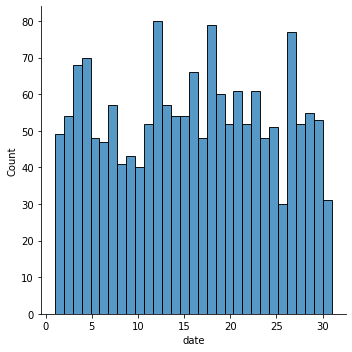

In [70]:
sns.displot(x=ls.date.dt.day,bins=31)

see while plotting a graph like this, it is hard if the compiler (i'm guessing its the compiler xD) encounters a NaN value.
So what we do is, we ignore all of them ( doesnt happen by default ). So what do we do?

Ye, we drop those rows.

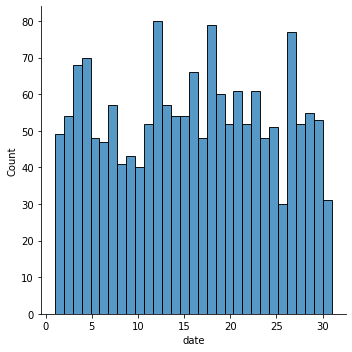

In [76]:
x=sns.displot(x=ls.date.dt.day.dropna(),bins=31)

In [12]:
with open('chennai_houses.csv') as rawdata:
    result=chardet.detect(rawdata.read(1000))

NameError: name 'chardet' is not defined